### Importing necessary libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [52]:
df=pd.read_csv('diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [54]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
# No null values or missing values

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

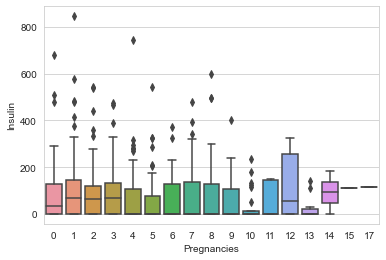

In [59]:
sns.boxplot(x="Pregnancies", y="Insulin", data=df)

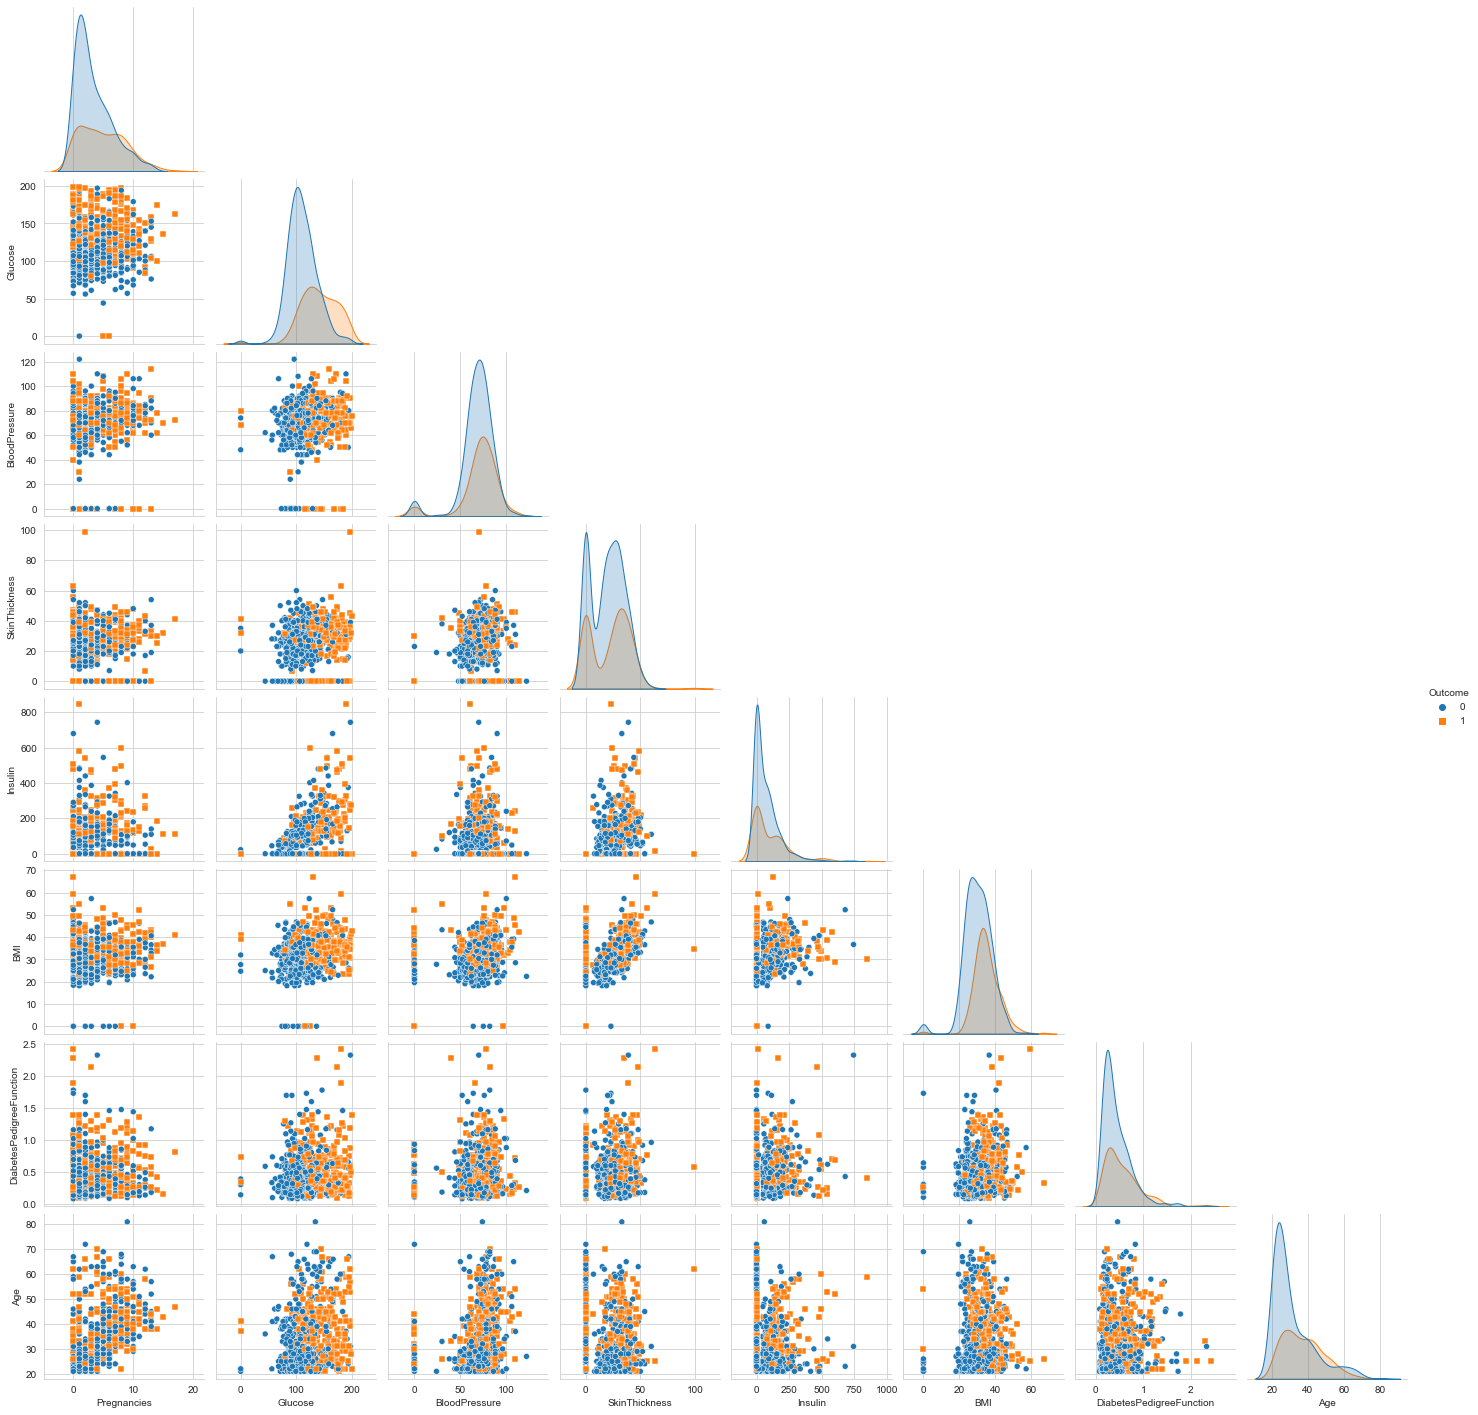

In [60]:
sns.pairplot(df, hue="Outcome", markers=["o", "s"], corner=True);


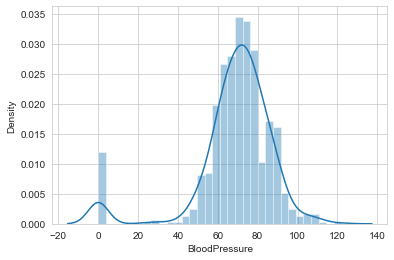

In [61]:
sns.distplot(df.BloodPressure.dropna());


In [62]:
df[df['BloodPressure'] == 0].describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,35.000000,35.000000,35.0,35.000000,35.0,35.000000,35.000000,35.000000,35.000000
mean,3.628571,117.800000,0.0,1.514286,0.0,25.705714,0.388429,30.714286,0.457143
std,3.646801,27.488821,0.0,6.298326,0.0,14.874553,0.254266,9.820661,0.505433
min,0.000000,73.000000,0.0,0.000000,0.0,0.000000,0.102000,21.000000,0.000000
25%,0.000000,97.500000,0.0,0.000000,0.0,21.650000,0.197500,24.500000,0.000000
50%,2.000000,117.000000,0.0,0.000000,0.0,28.900000,0.282000,28.000000,0.000000
75%,6.000000,133.500000,0.0,0.000000,0.0,34.550000,0.573500,34.000000,1.000000
max,13.000000,183.000000,0.0,30.000000,0.0,52.300000,0.933000,72.000000,1.000000


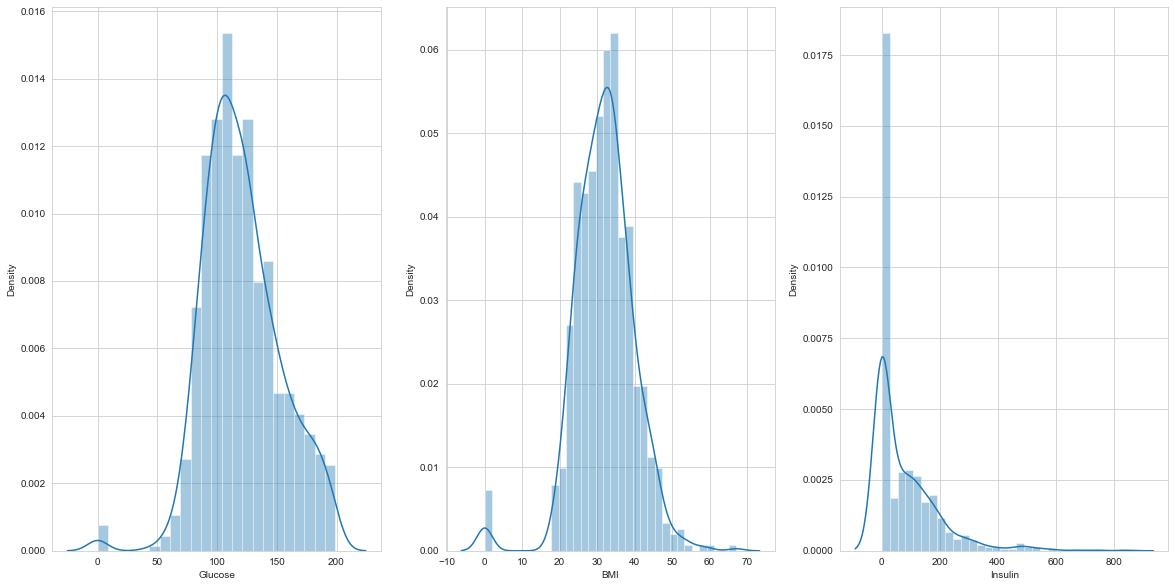

In [63]:
fig, axs = plt.subplots(ncols=3, figsize=(20,10))
sns.distplot(df.Glucose, ax = axs[0])
sns.distplot(df.BMI, ax = axs[1])
sns.distplot(df.Insulin, ax = axs[2])
plt.show()


## Feature Engineering

In [64]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values   

In [65]:
# SPlitting testing and training data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

## 1. Logistic Regression

In [68]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred_lr = lr_model.predict(X_test)

In [70]:
# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

In [71]:
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_lr:.2f}")
print("Classification Report:")
print(report_lr)

Logistic Regression Model:
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



## 2. SVM

In [72]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [73]:
# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

In [74]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

In [75]:
# Print results
print("Support Vector Machine (SVM) Model:")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Classification Report:")
print(report_svm)


Support Vector Machine (SVM) Model:
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       130
           1       0.71      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192



In [76]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
# Train the KNN model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## 3. KNN

In [77]:
y_pred_knn = knn_model.predict(X_test)

In [78]:
# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

In [79]:

print("K-Nearest Neighbors (KNN) Model:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:")
print(report_knn)


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       130
           1       0.71      0.65      0.68        62

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.80      0.80      0.80       192



## 4. GBM

In [80]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [81]:
# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

In [82]:
# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

In [83]:
print("Gradient Boosting Model:")
print(f"Accuracy: {accuracy_gb:.2f}")
print("Classification Report:")
print(report_gb)

Gradient Boosting Model:
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       130
           1       0.76      0.61      0.68        62

    accuracy                           0.81       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.81      0.81      0.81       192



### Out of all the models Gradient Boosting outperformed with an accuracy of 81%